## Gal3D Example: Ellipsoid_S
This example demonstrates how to use Gal3D for three-dimensional modeling of particle distributions in simulated galaxies.

First, Gal3D requires the coordinates (`pos`) and masses (`mass`) of the particles. Here, we use AnastrisTNG to extract stellar particle data from a galaxy in the TNG50 simulation.

In [1]:
from AnastrisTNG import TNGsimulation

path = '/home/yxi/Simulation/sims/TNG50-1/output'
snap =99
snapshot = TNGsimulation.Snapshot(path,snap)

ID = 516760 
sub = snapshot.load_particle(ID,order='star')
sub.physical_units()
coor_trans = sub.face_on(alignwith='star',rmax=8)

pos = sub.s['pos']
mass = sub.s['mass']

Now, let's begin the analysis with Gal3D.

In [3]:
from gal3d import print_gal3d_info
print_gal3d_info()

     ╭──────────────────────────────────────────────────────╮
    .│          .            .        .               .     │
     │   _______  _______  _      . ______+  ______ .       │
     │  (  ____ \(. ___  )( \      / ___ .\ (  __ .\        │
     │  |.(    \/| (   ) || (     .\/   \  \| (+ \  )       │
     │  | |      |.(___) || | .       ___) /| |   ) |  .    │
     │  |.| ____ |  ___  || |  .     (___ ( | |   |.|       │
     │  | | \_  )| ( + ) || |  .      .  ) \| |   ) | .     │
     │  | (___) || )  .( || (____/\/\___/  /| (__/  )       │
     │  (_______)|/     \|(_______/\______/ (______/  .     │
     │      .     .      .        .      .    .    .        │
     │.     Galaxy 3D Modeling.& Analysis.Framework     .   │
     │               .      .             .        .        │
     ╰──────────────────────────────────────────────────────╯

                                            gal3d version: 1.0.0



[2025-09-13 01:00:21.460] < gal3d.plugin > | INFO | Characterizer loaded plugins: Bar
[2025-09-13 01:00:21.462] < gal3d.plugin > | INFO | DensityEstimator loaded plugins: DensityEstimatorKNN
[2025-09-13 01:00:21.470] < gal3d.plugin > | INFO | ErrorWorkflow loaded plugins: EllipsoidErrorEstimator
[2025-09-13 01:00:21.490] < gal3d.plugin > | INFO | FitWorkflow loaded plugins: EllipsoidFitWorkflow
[2025-09-13 01:00:21.493] < gal3d.plugin > | INFO | Geometry loaded plugins: Ellipsoid, Ellipsoid_S
[2025-09-13 01:00:21.494] < gal3d.plugin > | INFO | ModelProjector loaded plugins: ProjectorLineIntegration, ProjectorSphGrid
[2025-09-13 01:00:22.805] < gal3d.plugin > | INFO | Optimizer loaded plugins: OptimizerScipy, OptimizerNLopt, OptimizerOptimagic, OptimizerLMFit



Plugin Managers and their Plugins:

Characterizer:
  - Bar

Coordinate:
  - EulerShift
  - ShiftEuler

DensityEstimator:
  - DensityEstimatorKNN

ErrorWorkflow:
  - EllipsoidErrorEstimator

FitWorkflow:
  - EllipsoidFitWorkflow

Geometry:
  - Ellipsoid
  - Ellipsoid_S

ModelProjector:
  - ProjectorLineIntegration
  - ProjectorSphGrid

Optimizer:
  - OptimizerLMFit
  - OptimizerNLopt
  - OptimizerOptimagic
  - OptimizerScipy



Next, pass `pos` and `mass` to Gal3D for analysis.

In [4]:
from gal3d.analyzer import Gal3DAnalyzer
gal = Gal3DAnalyzer.analyze(pos,mass)

[2025-09-13 01:00:32.219] < gal3d.particle.global_calculator > | INFO | Recentered positions by subtracting center: [-0.0008159  -0.00088915  0.00077898]
[2025-09-13 01:00:35.168] < gal3d.analyzer > | INFO | Set inner value to 1.53e+10
[2025-09-13 01:00:35.169] < gal3d.analyzer > | INFO | Set outer value to 5.75e+04
[2025-09-13 01:00:35.193] < gal3d.preprocessing.spherical_field.spherical_vector > | INFO | 1024 points on the sphere by fibonacci method have the uniformity of 99.688
[2025-09-13 01:00:35.195] < gal3d.field.SphField > | INFO |  build ray vector: 0.02 sec
[2025-09-13 01:00:35.798] from < field.py > line: 109 
  >>>  | WARNING | The axial ratio of the inner boundary shape is quite extreme. Consider limiting the particles or refining the boundary.
[2025-09-13 01:00:36.383] < gal3d.field.SphField > | INFO | Build field boundary: 1.19 sec
[2025-09-13 01:00:37.194] < gal3d.field.SphField > | INFO | Build profile sample: 0.81 sec
[2025-09-13 01:00:37.867] < gal3d.field.SphField >

In [5]:
res_ellipsoid_s = gal.fit(num_step=300)

[2025-09-13 01:00:41.406] < gal3d.analyzer > | INFO | Using workflow: EllipsoidFitWorkflow
Fitting radii: 100%|██████████| 300/300 [00:09<00:00, 32.74it/s]


Let's see some parameter profiles with estimated errors.

Text(0, 0.5, 'Ellipticity')

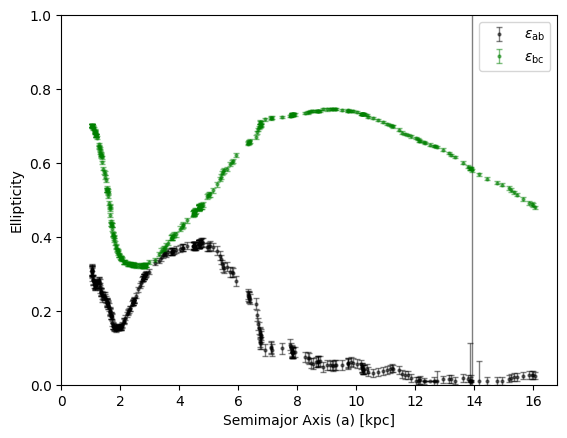

In [7]:
import matplotlib.pyplot as plt


plt.errorbar(res_ellipsoid_s['a'],res_ellipsoid_s['eps_ab'],
             yerr=res_ellipsoid_s['eps_ab_err'],label=r"$\epsilon_{\rm ab}$",
             fmt='o', c='k', capsize=2, markersize=2,linewidth=1,alpha=0.5)

plt.errorbar(res_ellipsoid_s['a'],res_ellipsoid_s['eps_bc'],
             yerr=res_ellipsoid_s['eps_bc_err'],label=r"$\epsilon_{\rm bc}$",
             fmt='o', c='g', capsize=2, markersize=2,linewidth=1,alpha=0.5)
plt.legend()
plt.ylim(0,1)
plt.xlim(0.,)
plt.xlabel(r"Semimajor Axis (a) [kpc]")
plt.ylabel(r"Ellipticity")

Text(0, 0.5, '$\\theta\\ [^\\circ]$')

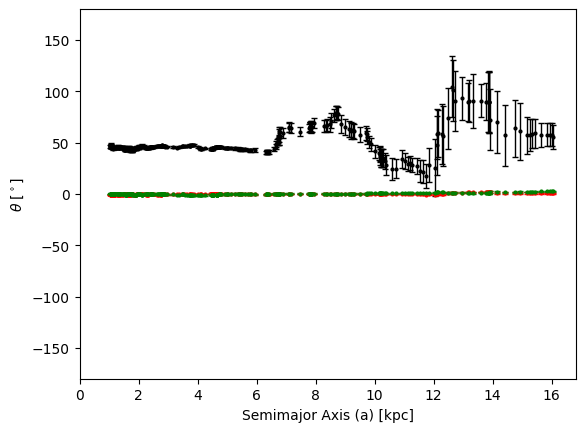

In [9]:
import numpy as np
plt.errorbar(res_ellipsoid_s['a'],res_ellipsoid_s['ang1']*180/np.pi,
             yerr=res_ellipsoid_s['ang1_err']*180/np.pi,
             fmt='o', c='k', capsize=2, markersize=2,linewidth=1,label=r"$\theta_z$")

plt.errorbar(res_ellipsoid_s['a'],res_ellipsoid_s['ang2']*180/np.pi,
             yerr=res_ellipsoid_s['ang2_err']*180/np.pi,
             fmt='o', c='r', capsize=2, markersize=2,linewidth=1,label=r"$\theta_y$")

plt.errorbar(res_ellipsoid_s['a'],res_ellipsoid_s['ang3']*180/np.pi,
             yerr=res_ellipsoid_s['ang3_err']*180/np.pi,
             fmt='o', c='g', capsize=2, markersize=2,linewidth=1,label=r"$\theta_x$")

plt.ylim(-180,180)
plt.xlim(0.,)
plt.xlabel(r"Semimajor Axis (a) [kpc]")
plt.ylabel(r"$\theta\ [^\circ]$")

Text(0, 0.5, 'Center Position [kpc]')

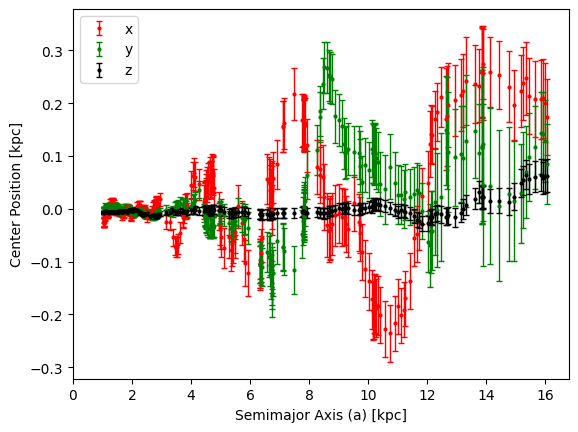

In [10]:
plt.errorbar(res_ellipsoid_s['a'],res_ellipsoid_s['x'],
             yerr=res_ellipsoid_s['x_err'],label="x",
             fmt='o', c='r', capsize=2, markersize=2,linewidth=1)
plt.errorbar(res_ellipsoid_s['a'],res_ellipsoid_s['y'],
             yerr=res_ellipsoid_s['y_err'],label="y",
             fmt='o', c='g', capsize=2, markersize=2,linewidth=1)
plt.errorbar(res_ellipsoid_s['a'],res_ellipsoid_s['z'],
             yerr=res_ellipsoid_s['z_err'],label="z",
             fmt='o', c='k', capsize=2, markersize=2,linewidth=1)

plt.legend()
plt.xlim(0.,)

plt.xlabel(r"Semimajor Axis (a) [kpc]")
plt.ylabel(r"Center Position [kpc]")

You can further analyze the results using Gal3D's built-in tools. This section demonstrates how to measure the bar structure of the galaxy.

In [11]:
from gal3d.characterization import Characterizer
bar = Characterizer.get_plugin('Bar')
bar(res_ellipsoid_s).measure()

{'flag': 1,
 'eps_max': 0.31189580000845096,
 'R_max': 1.048283877434558,
 'R_bar': 1.315371318905754}

Finally, visualize the fitted model alongside the real data.

In [12]:
from gal3d.visualization.model_projector import ModelProjector
from gal3d.visualization.data_model_residual import show_image_model_residual
ellipsoid_s_model = ModelProjector.get_plugin('ProjectorLineIntegration')(res_ellipsoid_s,sigma_clip=0)

Integrating Profiles: 100%|██████████| 22500/22500 [00:01<00:00, 11996.41it/s]


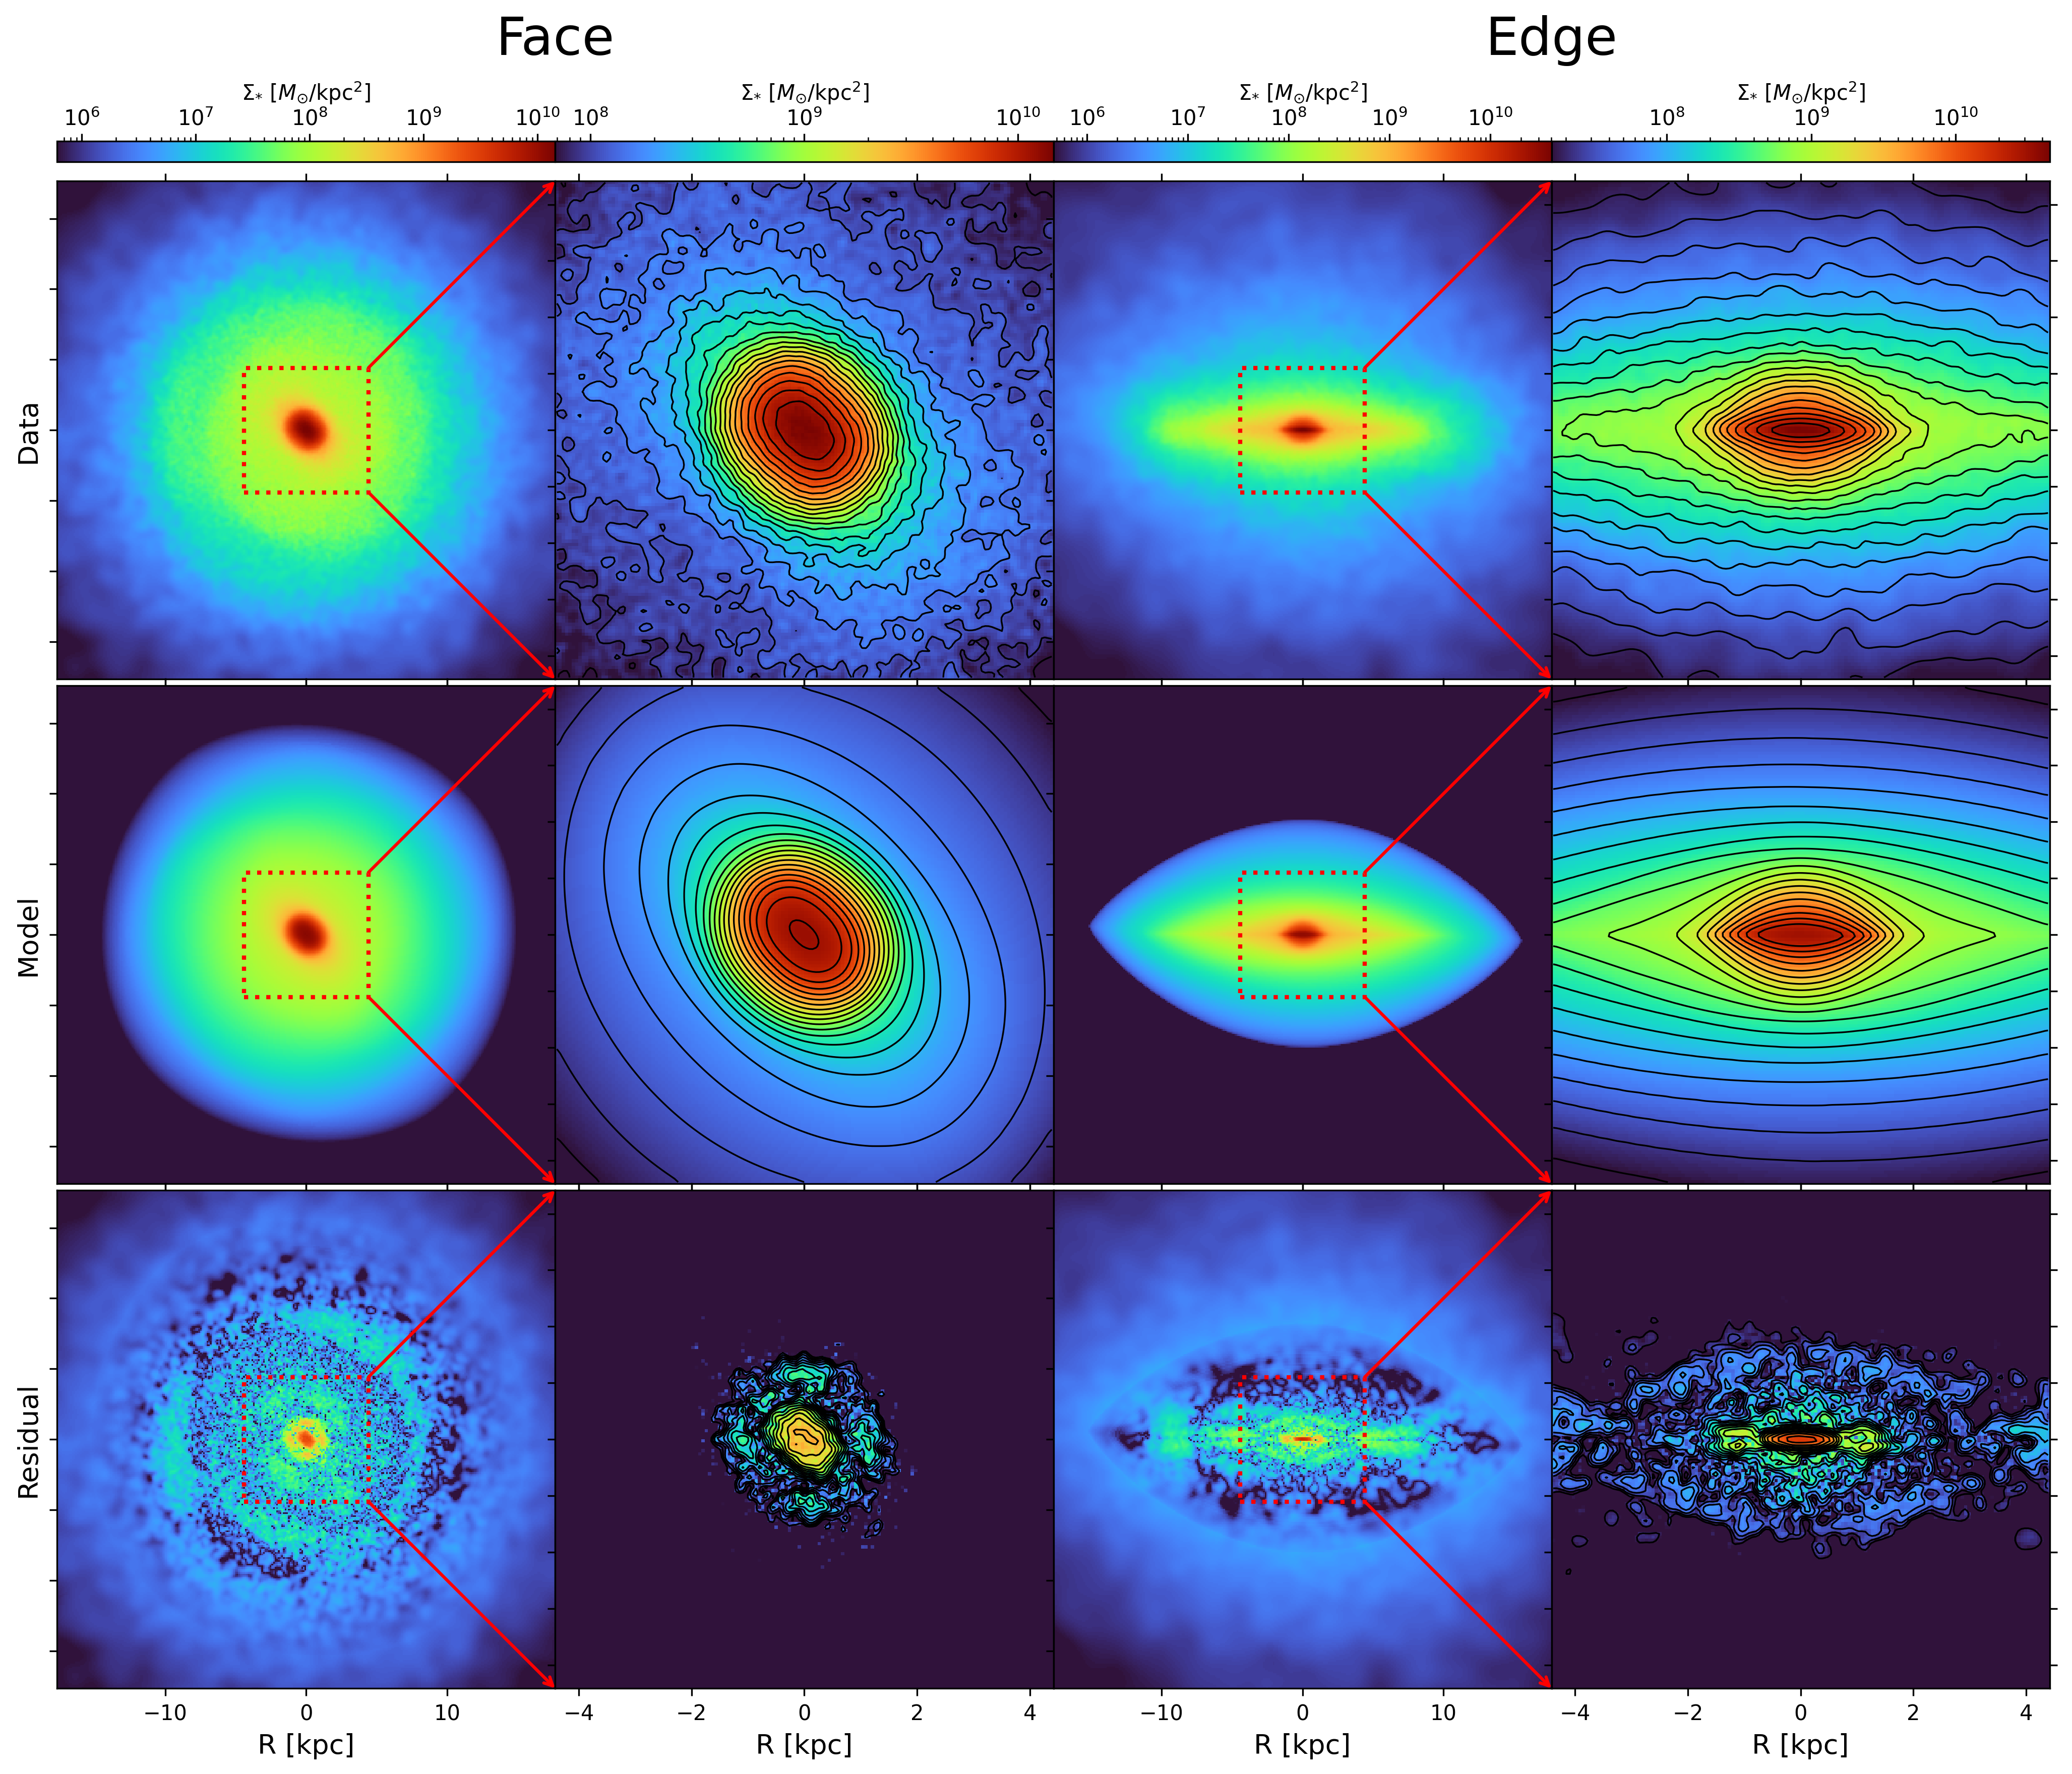

In [13]:
box_lh_max =res_ellipsoid_s['a'][-1]*1.1
zoom_lh_max = box_lh_max/4
fig = show_image_model_residual(gal.particle,ellipsoid_s_model,
                          large_box_x_range = (-box_lh_max,box_lh_max),
                          large_box_y_range= (-box_lh_max,box_lh_max),
                          zoom_x_range=(-zoom_lh_max,zoom_lh_max),
                          zoom_y_range=(-zoom_lh_max,zoom_lh_max),
                          depth_z_range=(-box_lh_max,box_lh_max),
                          nbins_large = 300,
                          nbins_zoom = 150,
                          nlevels_large=0,
                          nlevels_zoom=22)